In [1]:
import keras
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn import preprocessing
from sklearn.cluster import KMeans
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline
%load_ext tensorboard

Using TensorFlow backend.
/home/shaanzie/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shaanzie/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shaanzie/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shaanzie/.local/lib/python3.6/site-packages/tensorflo

Text(0, 0.5, 'Clusters')

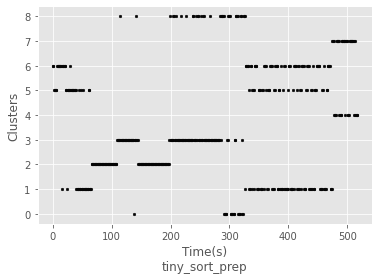

In [2]:
data = pd.read_csv("../data/HiBench/csvs/3.2.1/terasort_run.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.dropna()
# data 
IPC = list()
for i in data.iterrows():
    if(int(i[1][5]) == 0):
        IPC.append(None)
    else:
        if(int(i[1][1]) / int(i[1][5]) < -0.4 or int(i[1][1]) / int(i[1][5]) > 1):
            IPC.append(None)
        else:
            IPC.append(int(i[1][1]) / int(i[1][5]))
#     print(i[1][4])

data['IPC'] = IPC

data = data.dropna()

# Create x, where x the 'scores' column's values as floats
x = data.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data = pd.DataFrame(x_scaled)

# sse = []
# list_k = list(range(1, 20))

# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(data)
#     sse.append(km.inertia_)

# # Plot sse against k
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('Sum of squared distance');

# Number of clusters
kmeans = KMeans(n_clusters=9)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

arr = []
for i in range(len(labels)):
    arr.append(i)
# print(arr)
plt.scatter(arr, labels, c='#050505', s=7)
plt.xlabel("Time(s)\ntiny_sort_prep")
plt.ylabel("Clusters")

In [3]:
data['Current Cluster'] = labels
to_cluster = labels[1:]
to_cluster = np.append(to_cluster, [labels[-1]])
len(to_cluster)
data['Next Cluster'] = to_cluster
data

,0,1,2,3,4,5,6,7,8,9,10,11,Current Cluster,Next Cluster
0,0.000492,0.000480,0.002895,0.006325,0.007090,0.001951,0.000051,0.000000,0.000000,0.000000,0.000000,0.052351,6,6
1,0.001699,0.001526,0.003426,0.004929,0.007387,0.002809,0.000043,0.000013,0.000000,0.000000,0.000000,0.122578,6,5
2,0.184414,0.199815,0.295166,0.410972,0.415218,0.164890,0.000997,0.000877,0.012987,0.000000,0.000000,0.417736,5,5
3,0.149674,0.164176,0.194539,0.401805,0.534092,0.143095,0.001172,0.000990,0.066378,0.000000,0.000000,0.389543,5,5
4,0.290563,0.291288,0.529605,0.725636,0.692073,0.256825,0.001425,0.001473,0.066378,0.000000,0.000000,0.385361,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0.214896,0.211615,0.190894,0.136036,0.272686,0.119368,0.000312,0.000243,0.722944,0.957532,0.096714,0.656963,7,4
514,0.056615,0.059945,0.060155,0.040176,0.125481,0.032763,0.000098,0.001036,0.727273,0.957532,0.096714,0.660491,4,4
515,0.002819,0.002917,0.006295,0.007061,0.005291,0.003840,0.000523,0.001621,0.727273,0.957532,0.096714,0.188830,4,4
516,0.049597,0.051149,0.121193,0.099192,0.051149,0.042415,0.001036,0.001726,0.725830,0.957532,0.096714,0.406297,4,4


In [4]:
X = data.drop(['Next Cluster'], axis = 1)
y = data['Next Cluster']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

414 104 414 104


In [6]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Next Cluster   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              148.5
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                   4.91e-163
Time:                        19:39:18   Log-Likelihood:                         -1078.6
No. Observations:                 518   AIC:                                      2183.
Df Residuals:                     505   BIC:                                      2238.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
0                  -4.4242      3.840     -1.152      0.250     -11.968       3.120
1                  -8.1067      5.835     -1.389      0.165     -19.571       3.358
2                  -1.0816      1.384     -0.781      0.435      -3.801       1.638
3                   3.9799      1.363      2.919      0.004       1.301       6.659
4                  -1.8754      0.831     -2.258      0.024      -3.507      -0.244
5                  10.1838      4.471      2.278      0.023       1.399      18.968
6                   0.6425      1.621      0.396      0.692      -2.542       3.827
7                  -0.2688      1.439     -0.187      0.852      -3.097       2.559
8                  -0.5883      0.315     -1.869      0.062      -1.207       0.030
9                   1.1690      0.405      2.888      0.004       0.374       1.964
10                 -0.6005      0.310     -1.940      0.053      -1.209       0.008
11                  5.2895      0.583      9.080      0.000       4.145       6.434
Current Cluster     0.5739      0.036     15.795      0.000       0.502       0.645
==============================================================================
Omnibus:                       26.180   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.179
Skew:                           0.326   Prob(JB):                     3.45e-11
Kurtosis:                       4.344   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from hmmlearn import hmm

np.random.seed(42)
X = data[['Current Cluster', 'Next Cluster']]
model = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=100)
model.fit(X)
model.score(X)
model.monitor_

ConvergenceMonitor(
    history=[4867.188489574209, 1483.2304139827618],
    iter=6,
    n_iter=100,
    tol=0.01,
    verbose=False,
)

In [30]:
model.predict(X)

array([4, 9, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 6, 2, 4, 4, 4, 4, 9,
       4, 6, 2, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 6, 2, 6, 7, 7, 7,
       2, 6, 7, 2, 6, 7, 2, 6, 7, 7, 7, 7, 7, 7, 7, 7, 2, 4, 6, 7, 7, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 6, 2, 4, 9, 9, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       9, 9, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 4, 4, 4, 4, 4, 9, 9, 4, 4,
       4, 4, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 3, 7, 7,
       8, 3, 7, 8, 4, 3, 7, 7, 7, 8, 3, 7, 8, 4, 9, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 3,
       8, 4, 4, 4, 3, 7, 7, 7, 7, 5, 7, 8, 4, 4, 4,

In [31]:
X

,Current Cluster,Next Cluster
0,6,6
1,6,5
2,5,5
3,5,5
4,5,5
...,...,...
513,7,4
514,4,4
515,4,4
516,4,4


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(len(X_train), len(X_test), len(y_train), len(y_test))

466 52 466 52


In [72]:
model = Sequential()
ncols = X_train.shape[1]

model.add(Dense(10, activation = 'relu', input_shape = (ncols,)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

In [73]:
model.compile(loss='mean_squared_error',optimizer='Adamax',metrics=['accuracy'])

In [75]:

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks = [tensorboard_callback])

Train on 466 samples, validate on 52 samples
Epoch 1/40
466/466 [==============================] - 0s 30us/step - loss: 0.5954 - accuracy: 0.6030 - val_loss: 0.4918 - val_accuracy: 0.5000
Epoch 2/40
466/466 [==============================] - 0s 26us/step - loss: 0.5428 - accuracy: 0.6030 - val_loss: 0.4429 - val_accuracy: 0.5000
Epoch 3/40
466/466 [==============================] - 0s 31us/step - loss: 0.4913 - accuracy: 0.6030 - val_loss: 0.3985 - val_accuracy: 0.5000
Epoch 4/40
466/466 [==============================] - 0s 34us/step - loss: 0.4418 - accuracy: 0.6030 - val_loss: 0.3604 - val_accuracy: 0.5000
Epoch 5/40
466/466 [==============================] - 0s 32us/step - loss: 0.4003 - accuracy: 0.6330 - val_loss: 0.3254 - val_accuracy: 0.5000
Epoch 6/40
466/466 [==============================] - 0s 36us/step - loss: 0.3636 - accuracy: 0.6974 - val_loss: 0.2949 - val_accuracy: 0.6731
Epoch 7/40
466/466 [==============================] - 0s 31us/step - loss: 0.3299 - accuracy: 0.7

In [76]:
data['Predictions'] = np.rint(model.predict(X))

In [77]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,Current Cluster,Next Cluster,Predictions
0,0.000492,0.000480,0.002895,0.006325,0.007090,0.001951,0.000051,0.000000,0.000000,0.000000,0.000000,0.052351,6,6,6.0
1,0.001699,0.001526,0.003426,0.004929,0.007387,0.002809,0.000043,0.000013,0.000000,0.000000,0.000000,0.122578,6,5,5.0
2,0.184414,0.199815,0.295166,0.410972,0.415218,0.164890,0.000997,0.000877,0.012987,0.000000,0.000000,0.417736,5,5,5.0
3,0.149674,0.164176,0.194539,0.401805,0.534092,0.143095,0.001172,0.000990,0.066378,0.000000,0.000000,0.389543,5,5,5.0
4,0.290563,0.291288,0.529605,0.725636,0.692073,0.256825,0.001425,0.001473,0.066378,0.000000,0.000000,0.385361,5,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0.214896,0.211615,0.190894,0.136036,0.272686,0.119368,0.000312,0.000243,0.722944,0.957532,0.096714,0.656963,7,4,3.0
514,0.056615,0.059945,0.060155,0.040176,0.125481,0.032763,0.000098,0.001036,0.727273,0.957532,0.096714,0.660491,4,4,4.0
515,0.002819,0.002917,0.006295,0.007061,0.005291,0.003840,0.000523,0.001621,0.727273,0.957532,0.096714,0.188830,4,4,4.0
516,0.049597,0.051149,0.121193,0.099192,0.051149,0.042415,0.001036,0.001726,0.725830,0.957532,0.096714,0.406297,4,4,4.0
